##**DATA WRANGLING - MARTINEZ MARCELO**

**API** **DE THE COVID TRACKING PROJECT EN THE ATLANTIC** 



In [48]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno 
import json

In [49]:
# Especificamos la URL de solicitud para la API de "The COVID Tracking Project"

url = 'https://api.covidtracking.com/v1/us/daily.json'

# Enviamos la solicitud a la API y recibimos los datos de respuesta
response = requests.get(url)

# Analizamos los datos JSON de respuesta en un objeto de diccionario de Python
data = response.json()

# Mostramos los datos de respuesta
print(data)

[{'date': 20210307, 'states': 56, 'positive': 28756489, 'negative': 74582825, 'pending': 11808, 'hospitalizedCurrently': 40199, 'hospitalizedCumulative': 776361, 'inIcuCurrently': 8134, 'inIcuCumulative': 45475, 'onVentilatorCurrently': 2802, 'onVentilatorCumulative': 4281, 'dateChecked': '2021-03-07T24:00:00Z', 'death': 515151, 'hospitalized': 776361, 'totalTestResults': 363825123, 'lastModified': '2021-03-07T24:00:00Z', 'recovered': None, 'total': 0, 'posNeg': 0, 'deathIncrease': 842, 'hospitalizedIncrease': 726, 'negativeIncrease': 131835, 'positiveIncrease': 41835, 'totalTestResultsIncrease': 1170059, 'hash': 'a80d0063822e251249fd9a44730c49cb23defd83'}, {'date': 20210306, 'states': 56, 'positive': 28714654, 'negative': 74450990, 'pending': 11783, 'hospitalizedCurrently': 41401, 'hospitalizedCumulative': 775635, 'inIcuCurrently': 8409, 'inIcuCumulative': 45453, 'onVentilatorCurrently': 2811, 'onVentilatorCumulative': 4280, 'dateChecked': '2021-03-06T24:00:00Z', 'death': 514309, 'hos

In [50]:
print(json.dumps(data, indent=4))

[
    {
        "date": 20210307,
        "states": 56,
        "positive": 28756489,
        "negative": 74582825,
        "pending": 11808,
        "hospitalizedCurrently": 40199,
        "hospitalizedCumulative": 776361,
        "inIcuCurrently": 8134,
        "inIcuCumulative": 45475,
        "onVentilatorCurrently": 2802,
        "onVentilatorCumulative": 4281,
        "dateChecked": "2021-03-07T24:00:00Z",
        "death": 515151,
        "hospitalized": 776361,
        "totalTestResults": 363825123,
        "lastModified": "2021-03-07T24:00:00Z",
        "recovered": null,
        "total": 0,
        "posNeg": 0,
        "deathIncrease": 842,
        "hospitalizedIncrease": 726,
        "negativeIncrease": 131835,
        "positiveIncrease": 41835,
        "totalTestResultsIncrease": 1170059,
        "hash": "a80d0063822e251249fd9a44730c49cb23defd83"
    },
    {
        "date": 20210306,
        "states": 56,
        "positive": 28714654,
        "negative": 74450990,
        "

In [51]:
Casos=pd.DataFrame(data)
Casos.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


SE RENOMBRAN LOS CAMPOS

In [52]:
Casos= Casos.rename(columns={'date':'Fecha' , 
                     'states':'Estado' , 
                     'positive':'Positivos', 
                     'negative':'Negativos' , 
                     'pending':'Pendiente' , 
                     'hospitalizedCurrently':'Hospitalizado Actualmente' , 
                     'hospitalizedCumulative':'Hospitalizado Acumulativo' , 
                     'inIcuCurrently':'Actualmente UCI' ,
                     'inIcuCumulative':'Acumulado en UCI' , 
                     'onVentilatorCurrently':'Con Ventilación' , 
                     'dateChecked':'Fecha Comprobada' ,
                     'death':'Muertes' , 
                     'deathIncrease':'Incremento de Muerte' , 
                     'hospitalized':'Hospitalizado' ,
                     'hospitalizedIncrease':'Aumento de Hospitalizados' , 
                     'lastModified':'Última Modificación' ,
                     'negativeIncrease':'Aumento de Negativos' , 
                     'onVentilatorCumulative':'Han estado con ventilación' ,
                     'positiveIncrease':'Aumento Positivos' , 
                     'recovered':'Recuperados' , 
                     'total':'Total' ,
                     'totalTestResults':'Resultado de pruebas totales' , 
                     'totalTestResultsIncrease':'Incremento de resultados de pruebas'
            })

A continuación se realiza el reformateo de la variable "FECHA" para que el mismo pase de ser del tipo entero al tipo fecha.

In [53]:
Casos['Fecha'] = pd.to_datetime(Casos['Fecha'], format="%Y%m%d")
Casos

,Fecha,Estado,Positivos,Negativos,Pendiente,Hospitalizado Actualmente,Hospitalizado Acumulativo,Actualmente UCI,Acumulado en UCI,Con Ventilación,...,Última Modificación,Recuperados,Total,posNeg,Incremento de Muerte,Aumento de Hospitalizados,Aumento de Negativos,Aumento Positivos,Incremento de resultados de pruebas,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,2020-01-16,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,2020-01-15,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,2020-01-14,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


Se procede a convertir los campos "FECHA COMPROBADA" y "ÚLTIMA MODIFICACIÓN" en dato tipo string.

In [54]:
Casos['Fecha Comprobada'] = Casos['Fecha Comprobada'].astype(str)
Casos['Última Modificación'] = Casos['Última Modificación'].astype(str)

Se extraen solamente los caracteres que permitirán obtener un dato tipo fecha.

In [55]:
Casos['Fecha Comprobada'] = Casos['Fecha Comprobada'].str[0:10]
Casos['Última Modificación'] = Casos['Última Modificación'].str[0:10]

Se formatean los valores almacenados en los campos  "FECHA COMPROBADA" y "ÚLTIMA MODIFICACIÓN" para que sean de tipo fecha.

In [56]:
Casos['Fecha Comprobada'] = pd.to_datetime(Casos['Fecha Comprobada'], format="%Y-%m-%d")
Casos['Última Modificación'] = pd.to_datetime(Casos['Última Modificación'], format="%Y-%m-%d")

Se presentan los datos mediante la sentencia "head()".

In [57]:
Casos.head()

,Fecha,Estado,Positivos,Negativos,Pendiente,Hospitalizado Actualmente,Hospitalizado Acumulativo,Actualmente UCI,Acumulado en UCI,Con Ventilación,...,Última Modificación,Recuperados,Total,posNeg,Incremento de Muerte,Aumento de Hospitalizados,Aumento de Negativos,Aumento Positivos,Incremento de resultados de pruebas,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


Se busca analizar la existencia de valores nulos en los campos del dataframe.

In [58]:
Casos.isnull().sum()

Fecha                                    0
Estado                                   0
Positivos                                1
Negativos                               48
Pendiente                               51
Hospitalizado Actualmente               64
Hospitalizado Acumulativo               51
Actualmente UCI                         73
Acumulado en UCI                        72
Con Ventilación                         72
Han estado con ventilación              79
Fecha Comprobada                         0
Muertes                                 28
Hospitalizado                           51
Resultado de pruebas totales             0
Última Modificación                      0
Recuperados                            420
Total                                    0
posNeg                                   0
Incremento de Muerte                     0
Aumento de Hospitalizados                0
Aumento de Negativos                     0
Aumento Positivos                        0
Incremento 

La variable "RECUPERADOS" contiene en su totalidad valores nulos. Por ello se procede a eliminarla.

In [59]:
Casos = Casos.drop(['Recuperados'], axis=1)

Se obtiene información sobre los campos que componen el dataframe y el tipo de dato que contienen.

In [60]:
Casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Fecha                                420 non-null    datetime64[ns]
 1   Estado                               420 non-null    int64         
 2   Positivos                            419 non-null    float64       
 3   Negativos                            372 non-null    float64       
 4   Pendiente                            369 non-null    float64       
 5   Hospitalizado Actualmente            356 non-null    float64       
 6   Hospitalizado Acumulativo            369 non-null    float64       
 7   Actualmente UCI                      347 non-null    float64       
 8   Acumulado en UCI                     348 non-null    float64       
 9   Con Ventilación                      348 non-null    float64       
 10  Han estado con

VISUALIZACIONES

A continuación se realizan representaciones gráficas de lo antedicho.

<Axes: >

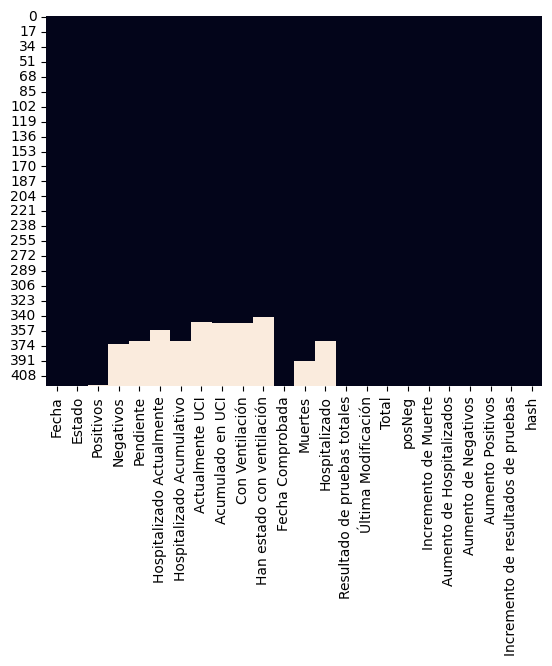

In [61]:
sns.heatmap(Casos.isnull(), cbar=False)

<Axes: >

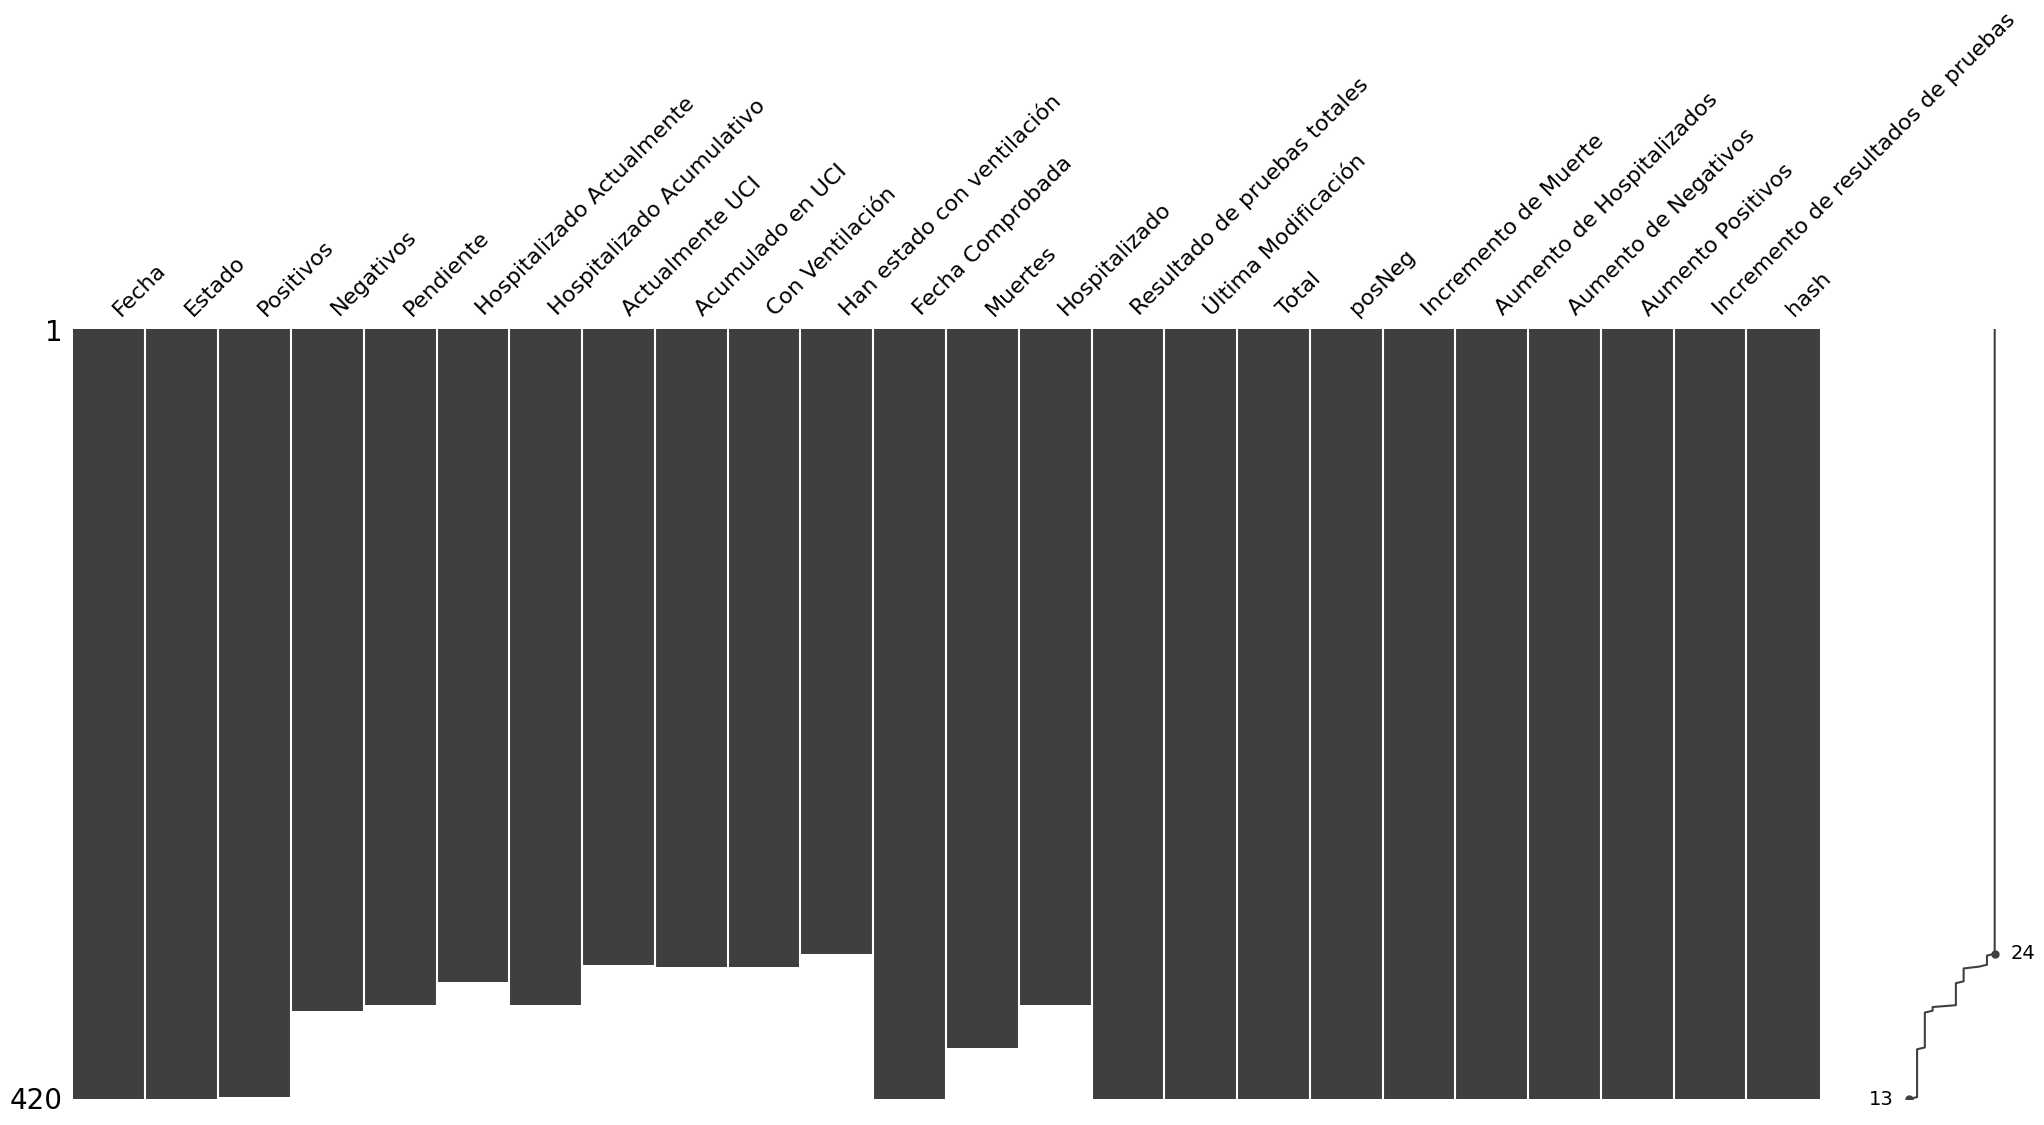

In [62]:
msno.matrix(Casos)

Se eliminan filas con valores nulos

In [63]:
Casos = Casos.dropna()
Casos

,Fecha,Estado,Positivos,Negativos,Pendiente,Hospitalizado Actualmente,Hospitalizado Acumulativo,Actualmente UCI,Acumulado en UCI,Con Ventilación,...,Resultado de pruebas totales,Última Modificación,Total,posNeg,Incremento de Muerte,Aumento de Hospitalizados,Aumento de Negativos,Aumento Positivos,Incremento de resultados de pruebas,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,363825123,2021-03-07,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,362655064,2021-03-06,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,361224072,2021-03-05,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,359479655,2021-03-04,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,357888671,2021-03-03,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2020-04-05,56,342104.0,788594.0,17311.0,32180.0,13374.0,5811.0,609.0,650.0,...,1940649,2020-04-05,0,0,1340,1131,33621,25843,129412,56a4702b083f7b368721d724ef0a2860dfd0bf8c
337,2020-04-04,56,316261.0,754973.0,15568.0,30456.0,12243.0,5500.0,403.0,656.0,...,1811237,2020-04-04,0,0,1478,1732,143525,33122,231115,80587c8a6dc1df9fb0dc5502807c3dceba5d3011
338,2020-04-03,56,283139.0,611448.0,61956.0,25723.0,10511.0,4928.0,335.0,623.0,...,1580122,2020-04-03,0,0,1288,1189,54760,31835,142407,64bb07cf101c54d11933762aecfa917b2203918c
339,2020-04-02,56,251304.0,556688.0,62085.0,22995.0,9322.0,4513.0,305.0,576.0,...,1437715,2020-04-02,0,0,1175,1320,51405,28135,131146,26f5631636844aa583b09bfd838468403f2ae263


Se elimina el campo "HASH"

In [64]:
Casos = Casos.drop(['hash'], axis=1)

Luego de llevar adelante la limpieza y transformación de los datos se llega a un nuevo dataframe, el cual se presenta a continuación:

In [65]:
Casos.head()

,Fecha,Estado,Positivos,Negativos,Pendiente,Hospitalizado Actualmente,Hospitalizado Acumulativo,Actualmente UCI,Acumulado en UCI,Con Ventilación,...,Hospitalizado,Resultado de pruebas totales,Última Modificación,Total,posNeg,Incremento de Muerte,Aumento de Hospitalizados,Aumento de Negativos,Aumento Positivos,Incremento de resultados de pruebas
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,776361.0,363825123,2021-03-07,0,0,842,726,131835,41835,1170059
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,775635.0,362655064,2021-03-06,0,0,1680,503,143835,60015,1430992
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,775132.0,361224072,2021-03-05,0,0,2221,2781,271917,68787,1744417
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,772351.0,359479655,2021-03-04,0,0,1743,1530,177957,65487,1590984
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,770821.0,357888671,2021-03-03,0,0,2449,2172,267001,66836,1406795
